# Part 1: Covid19 Data Analysis -from Jan,2020 to April,2020
------------------------------------------

### Import the libraries 

In [277]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Module:1

### Module 1.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from local folder. 


In [278]:
covid_df = pd.read_csv("../Coursera Covid 19 Analysis Project/Covid19_Confirmed_dataset.csv")
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [279]:
covid_df.shape

(266, 104)

### Module 1.2: Delete the useless columns

In [280]:
covid_df.drop(["Lat","Long"],axis=1,inplace=True)


In [281]:
covid_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Module 1.3: Aggregating the rows by the country

In [282]:
covid_df_agg=covid_df.groupby('Country/Region').sum()

In [283]:
covid_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [284]:
covid_df_agg.shape

(187, 100)

### Module 1.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

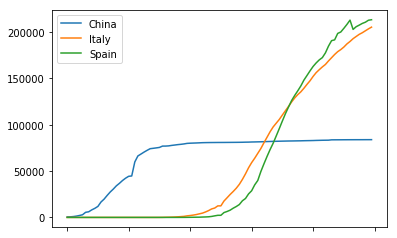

In [285]:
covid_df_agg.loc['China'].plot()
covid_df_agg.loc['Italy'].plot()
covid_df_agg.loc['Spain'].plot()
plt.legend()
plt.show()

### Module 2: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

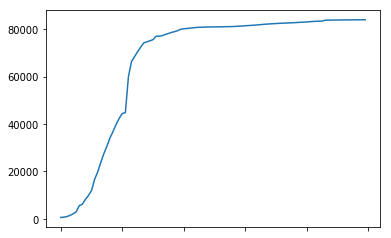

In [286]:
covid_df_agg.loc['China'].plot()

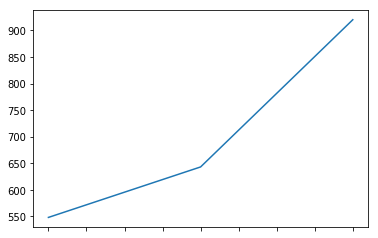

In [287]:
covid_df_agg.loc["China"][:3].plot()

### Module 2.1: caculating the first derivative of the curve

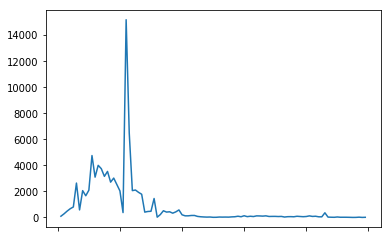

In [288]:
covid_df_agg.loc["China"].diff().plot()

### Module 2.2: find maxmimum infection rate for China

In [289]:
covid_df_agg.loc["China"].diff().max()

15136.0

In [290]:
covid_df_agg.loc["Italy"].diff().max()

6557.0

In [291]:
covid_df_agg.loc["Spain"].diff().max()

9630.0

### Module 2.3: find maximum infection rate for all of the countries. 

In [292]:
countries=list(covid_df_agg.index)
max_infection_rate = []
for c in countries:
    max_infection_rate.append(covid_df_agg.loc[c].diff().max())

max_infection_rate

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [293]:
#Let us append this max_infection_rate with previous aggregated dataset
covid_df_agg["max_infection_rate"]=max_infection_rate
covid_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Module 2.4: create a new dataframe with only needed column 

In [294]:
covid_data = pd.DataFrame(covid_df_agg["max_infection_rate"])
covid_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Module 3: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Module 3.1 : importing the dataset

In [295]:
happiness_report =pd.read_csv("../Coursera Covid 19 Analysis Project/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [296]:
happiness_report.shape

(156, 9)

### Module 3.2: let's drop the useless columns 

In [297]:
#For current analysis we do not need overall rank ,score which is sum of the other life factors for corresponding country,perception of corrution.

drop_cols = ["Overall rank","Score","Perceptions of corruption"]
happiness_report.drop(drop_cols,axis=1,inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,1.340,1.587,0.986,0.596,0.153
1,Denmark,1.383,1.573,0.996,0.592,0.252
2,Norway,1.488,1.582,1.028,0.603,0.271
3,Iceland,1.380,1.624,1.026,0.591,0.354
4,Netherlands,1.396,1.522,0.999,0.557,0.322


### Module 3.3: changing the indices of the dataframe

In [298]:
happiness_report.set_index("Country or region",inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.153
Denmark,1.383,1.573,0.996,0.592,0.252
Norway,1.488,1.582,1.028,0.603,0.271
Iceland,1.380,1.624,1.026,0.591,0.354
Netherlands,1.396,1.522,0.999,0.557,0.322


### Module 3.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [299]:
covid_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [300]:
happiness_report.shape

(156, 5)

In [301]:
covid_data_with_happiness_report= covid_data.join(happiness_report,how="inner")
covid_data_with_happiness_report.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Afghanistan,232.0,0.350,0.517,0.361,0.000,0.158
Albania,34.0,0.947,0.848,0.874,0.383,0.178
Algeria,199.0,1.002,1.160,0.785,0.086,0.073
Argentina,291.0,1.092,1.432,0.881,0.471,0.066
Armenia,134.0,0.850,1.055,0.815,0.283,0.095


### Module 3.5: correlation matrix 

In [302]:
covid_data_with_happiness_report.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196,-0.114635
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603,-0.103870
Social support,0.191958,0.759468,1.000000,0.765286,0.456246,-0.061361
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892,-0.068387
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000,0.258539
Generosity,-0.114635,-0.103870,-0.061361,-0.068387,0.258539,1.000000


### Module 4: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [303]:
covid_data_with_happiness_report.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Afghanistan,232.0,0.350,0.517,0.361,0.000,0.158
Albania,34.0,0.947,0.848,0.874,0.383,0.178
Algeria,199.0,1.002,1.160,0.785,0.086,0.073
Argentina,291.0,1.092,1.432,0.881,0.471,0.066
Armenia,134.0,0.850,1.055,0.815,0.283,0.095


### Module 4.1: Plotting GDP vs maximum Infection rate

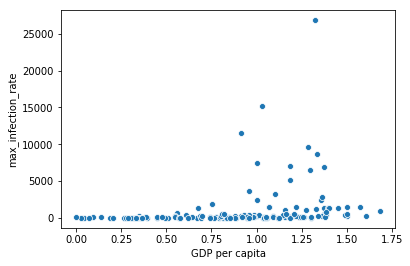

In [304]:

x=covid_data_with_happiness_report["GDP per capita"]
y=covid_data_with_happiness_report["max_infection_rate"]
sns.scatterplot(x,y)

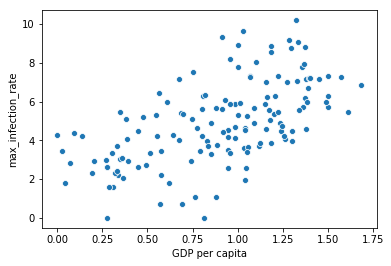

In [305]:
#Since max infection rate has higher spread of data than  other factors, in order to scale both the axes we are taking log of max infection rate
sns.scatterplot(x,np.log(y))

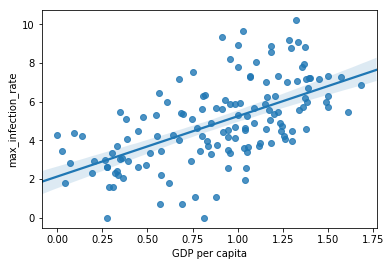

In [306]:
sns.regplot(x,np.log(y))

### Module 4.2: Plotting Social support vs maximum Infection rate

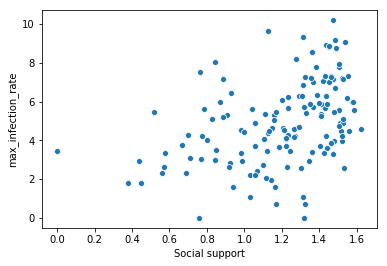

In [307]:
x1=covid_data_with_happiness_report["Social support"]
y1=covid_data_with_happiness_report["max_infection_rate"]
sns.scatterplot(x1,np.log(y1))

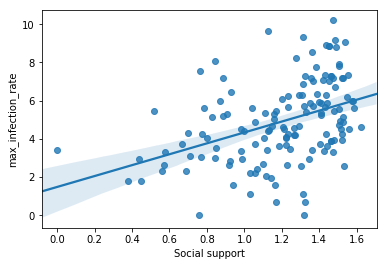

In [308]:
sns.regplot(x1,np.log(y1))

### Module 4.3: Plotting Healthy life expectancy vs maximum Infection rate

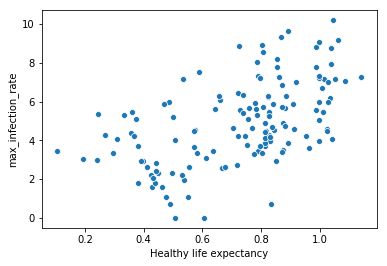

In [309]:
x2=covid_data_with_happiness_report["Healthy life expectancy"]
y2=covid_data_with_happiness_report["max_infection_rate"]
sns.scatterplot(x2,np.log(y2))

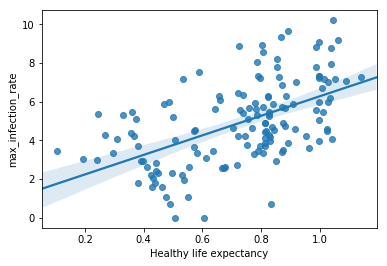

In [310]:
sns.regplot(x2,np.log(y2))

### Module 4.4: Plotting Freedom to make life choices vs maximum Infection rate

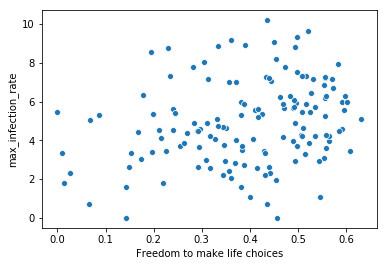

In [311]:
x3=covid_data_with_happiness_report["Freedom to make life choices"]
y3=covid_data_with_happiness_report["max_infection_rate"]
sns.scatterplot(x3,np.log(y3))

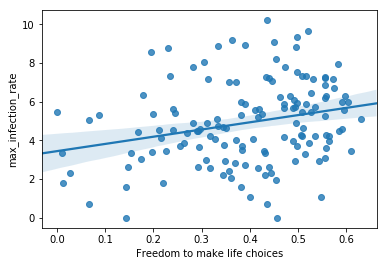

In [312]:
sns.regplot(x3,np.log(y3))

In [313]:
covid_death = pd.read_csv("../Coursera Covid 19 Analysis Project/covid19_deaths_dataset.csv")
covid_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [314]:
#Lets remove lat and long from death reports and aggregate data country wise

covid_death.drop(["Lat","Long"],axis=1,inplace=True)
covid_death.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [315]:
covid_death_agg=covid_death.groupby('Country/Region').sum()

In [316]:
covid_death_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


# Module 5: Covid Death Rate

In [317]:
countries=list(covid_death_agg.index)
max_death_rate = []
for c in countries:
    max_death_rate.append(covid_death_agg.loc[c].diff().max())

max_death_rate

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

## Module 5.1: We will append death rate with death dataset

In [318]:
covid_death_agg['max_death_rate']=max_death_rate
covid_death_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


  We will create a dataframe with max death rate per country

In [319]:
covid_death_data=pd.DataFrame(covid_death_agg["max_death_rate"])
covid_death_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [320]:
#There are few countries who has 0 max death rate. We will separate out those countries for our covid death rate relation analysis.
covid_death_data.loc[covid_death_data.max_death_rate==0]

,max_death_rate
Country/Region,
Bhutan,0.0
Cambodia,0.0
Central African Republic,0.0
Comoros,0.0
Dominica,0.0
Eritrea,0.0
Fiji,0.0
Grenada,0.0
Holy See,0.0


In [321]:
covid_zero_death_countries=list(covid_death_data.loc[covid_death_data.max_death_rate==0].index)

In [322]:
#This countries has zero covid death reported during this time period
covid_zero_death_countries

['Bhutan',
 'Cambodia',
 'Central African Republic',
 'Comoros',
 'Dominica',
 'Eritrea',
 'Fiji',
 'Grenada',
 'Holy See',
 'Laos',
 'Madagascar',
 'Mongolia',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Papua New Guinea',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Seychelles',
 'South Sudan',
 'Tajikistan',
 'Timor-Leste',
 'Uganda',
 'Vietnam',
 'Western Sahara']

In [323]:
#covid_nonzero_death_data
covid_death_data_with_nonzero_death = covid_death_data[~covid_death_data.index.isin(covid_zero_death_countries)]
covid_death_data_with_nonzero_death.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [324]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,0.153
Denmark,1.383,1.573,0.996,0.592,0.252
Norway,1.488,1.582,1.028,0.603,0.271
Iceland,1.380,1.624,1.026,0.591,0.354
Netherlands,1.396,1.522,0.999,0.557,0.322


In [325]:
# Let us merge happiness report with death data

In [326]:
covid_death_happiness_data=covid_death_data_with_nonzero_death.join(happiness_report,how="inner")
covid_death_happiness_data.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Afghanistan,7.0,0.350,0.517,0.361,0.000,0.158
Albania,4.0,0.947,0.848,0.874,0.383,0.178
Algeria,30.0,1.002,1.160,0.785,0.086,0.073
Argentina,13.0,1.092,1.432,0.881,0.471,0.066
Armenia,3.0,0.850,1.055,0.815,0.283,0.095


In [327]:
covid_death_happiness_data

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Afghanistan,7.0,0.350,0.517,0.361,0.000,0.158
Albania,4.0,0.947,0.848,0.874,0.383,0.178
Algeria,30.0,1.002,1.160,0.785,0.086,0.073
Argentina,13.0,1.092,1.432,0.881,0.471,0.066
Armenia,3.0,0.850,1.055,0.815,0.283,0.095
Australia,8.0,1.372,1.548,1.036,0.557,0.332
Austria,30.0,1.376,1.475,1.016,0.532,0.244
Azerbaijan,3.0,1.043,1.147,0.769,0.351,0.035
Bahrain,1.0,1.362,1.368,0.871,0.536,0.255
Bangladesh,15.0,0.562,0.928,0.723,0.527,0.166


In [328]:
covid_death_happiness_data.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
max_death_rate,1.000000,0.245063,0.202206,0.302945,0.082132,-0.016990
GDP per capita,0.245063,1.000000,0.750481,0.865584,0.406969,-0.054182
Social support,0.202206,0.750481,1.000000,0.756453,0.457669,-0.026749
Healthy life expectancy,0.302945,0.865584,0.756453,1.000000,0.426723,-0.028871
Freedom to make life choices,0.082132,0.406969,0.457669,0.426723,1.000000,0.293344
Generosity,-0.016990,-0.054182,-0.026749,-0.028871,0.293344,1.000000


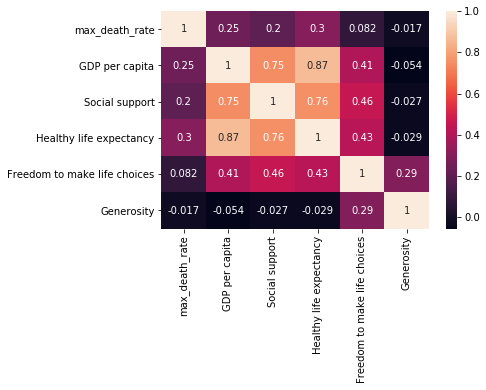

In [329]:
#Heatmap for correlation between covid death and different life factors
sns.heatmap(covid_death_happiness_data.corr(),annot=True)

In [330]:
#Visualization of the results for covid death and life factors 

### Module 5.2 Plotting GDP vs maximum death rate

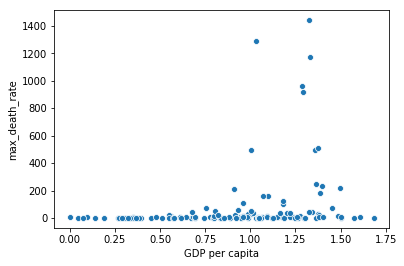

In [331]:
x=covid_death_happiness_data["GDP per capita"]
y=covid_death_happiness_data["max_death_rate"]
sns.scatterplot(x,y)

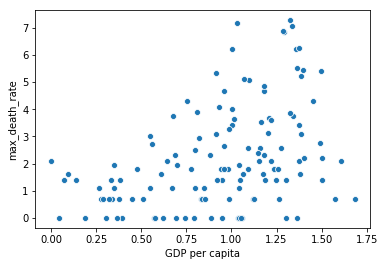

In [332]:
# We need to scale max death rate data to visualize data 
sns.scatterplot(x,np.log(y))

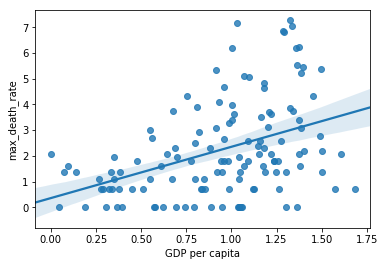

In [333]:
sns.regplot(x,np.log(y))

### Module 5.3 Plotting Social support vs maximum death rate

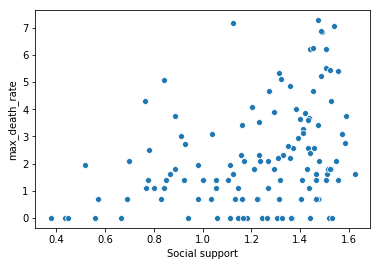

In [334]:
x1=covid_death_happiness_data["Social support"]
y1=covid_death_happiness_data["max_death_rate"]
sns.scatterplot(x1,np.log(y1))

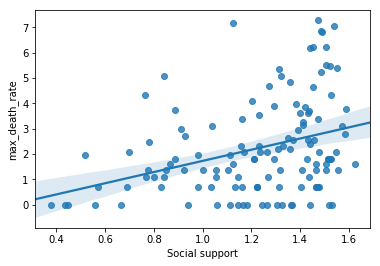

In [335]:
sns.regplot(x1,np.log(y1))

### Module 5.4 Plotting Healthy life expectancy vs maximum death rate 

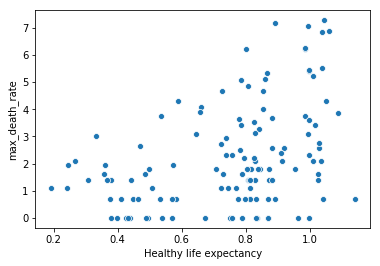

In [336]:
x2=covid_death_happiness_data["Healthy life expectancy"]
y2=covid_death_happiness_data["max_death_rate"]
sns.scatterplot(x2,np.log(y2))

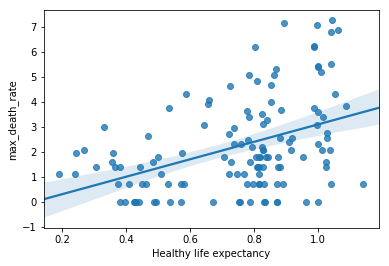

In [337]:
sns.regplot(x2,np.log(y2))

### Module 5.5 Plotting Freedom to make life choices vs maximum death rate

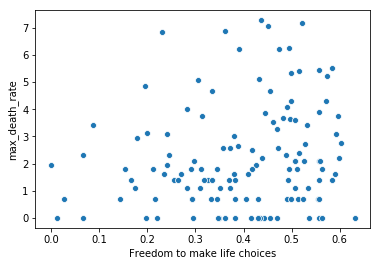

In [338]:
x3=covid_death_happiness_data["Freedom to make life choices"]
y3=covid_death_happiness_data["max_death_rate"]
sns.scatterplot(x3,np.log(y3))

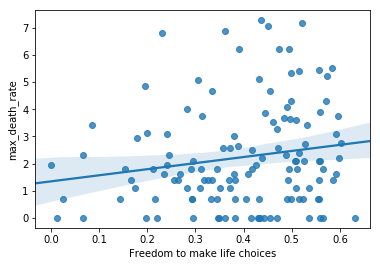

In [339]:
sns.regplot(x3,np.log(y3))

# Part 2: Now we will analyse in similar way for covid infection data till February,2021.

In [435]:
covid_df_updated = pd.read_csv("../Coursera Covid 19 Analysis Project/Covid_19_data.csv")
covid_df_updated.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#### We will create two separate dataframes : one for confirmed cases and one for death cases.
#### In confirmed cases data we are considering observation date, state,country and cummulative confirmed case numbers


In [436]:
covid_cnfrm_updated = covid_df_updated.drop(['SNo','Last Update','Deaths','Recovered'],axis=1)
covid_cnfrm_updated.head()

,ObservationDate,Province/State,Country/Region,Confirmed
0,01/22/2020,Anhui,Mainland China,1.0
1,01/22/2020,Beijing,Mainland China,14.0
2,01/22/2020,Chongqing,Mainland China,6.0
3,01/22/2020,Fujian,Mainland China,1.0
4,01/22/2020,Gansu,Mainland China,0.0


### and in death data we are considering observation date, state,country and cummulative death case numbers

In [437]:
covid_death_updated = covid_df_updated.drop(['SNo','Last Update','Confirmed','Recovered'],axis=1)
covid_death_updated.head()

,ObservationDate,Province/State,Country/Region,Deaths
0,01/22/2020,Anhui,Mainland China,0.0
1,01/22/2020,Beijing,Mainland China,0.0
2,01/22/2020,Chongqing,Mainland China,0.0
3,01/22/2020,Fujian,Mainland China,0.0
4,01/22/2020,Gansu,Mainland China,0.0


In [438]:
covid_cnfrm_updated2=covid_cnfrm_updated.pivot_table(values = 'Confirmed', index = ['ObservationDate','Country/Region'], aggfunc = sum)
covid_cnfrm_updated2=covid_cnfrm_updated2.reset_index()
covid_cnfrm_updated2.head()

,ObservationDate,Country/Region,Confirmed
0,01/01/2021,Afghanistan,51526.0
1,01/01/2021,Albania,58316.0
2,01/01/2021,Algeria,99897.0
3,01/01/2021,Andorra,8117.0
4,01/01/2021,Angola,17568.0


In [439]:
covid_cnfrm_updated2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61520 entries, 0 to 61519
Data columns (total 3 columns):
ObservationDate    61520 non-null object
Country/Region     61520 non-null object
Confirmed          61520 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


Country name in the data needs clean up.Country St. Martin exists in the list in two different naming formats- St. Martin and ('St. Martin',)
So we will keep the name 'St. Martin'.Also, Bahamas and Gambia are present in three different naming formats -
'Bahamas', 'Bahamas, The','The Bahamas'
and 'Gambia', 'Gambia, The','The Gambia'. For both country names we will keep only 'Bahamas' and 'Gamebia' respectively.

We also obeserved that Guinea is present in four namings such as - 'French Guiana','Equatorial Guinea','Guinea', 'Guinea-Bissau'.
As per https://www.economist.com/the-economist-explains/2017/09/12/why-the-world-has-so-many-guineas , at independence, French Guinea became Guinea, Spanish Guinea became Equatorial Guinea, and Portuguese Guinea became Guinea-Bissau.
So we can merge data from 'French Guiana' and 'Guinea' and keep the name as'Guinea'.

Also,country name 'Azerbaijan' has one extra space padded in front of its name.So we get rid off that too.


In [440]:
covid_cnfrm_updated2['Country/Region'].replace("('St. Martin',)","St. Martin",inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('Bahamas, The','Bahamas',inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('The Bahamas','Bahamas',inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('Gambia, The','Gambia',inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('The Gambia','Gambia',inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('French Guiana','Guinea',inplace=True)

covid_cnfrm_updated2['Country/Region'].replace(' Azerbaijan','Azerbaijan',inplace=True)

#Using full form of UK and US
covid_cnfrm_updated2['Country/Region'].replace('UK','United Kingdom',inplace=True)
covid_cnfrm_updated2['Country/Region'].replace('US','United States',inplace=True)

 Observation date field is not sorted so if we plot the data now, we might not see the true progress of the infection since Feb,2020 to Feb,2021.
So, before we plot the data we need to format and sort by observation date

In [441]:
covid_cnfrm_updated2.ObservationDate=pd.to_datetime(covid_cnfrm_updated2.ObservationDate,format='%m/%d/%Y')

In [442]:
covid_cnfrm_updated2.sort_values(by='ObservationDate',ascending=True,inplace=True)

In [443]:
covid_cnfrm_updated2.head()

,ObservationDate,Country/Region,Confirmed
3667,2020-01-22,Hong Kong,0.0
3668,2020-01-22,Japan,2.0
3669,2020-01-22,Macau,1.0
3670,2020-01-22,Mainland China,547.0
3671,2020-01-22,South Korea,1.0


<Figure size 4320x2160 with 0 Axes>

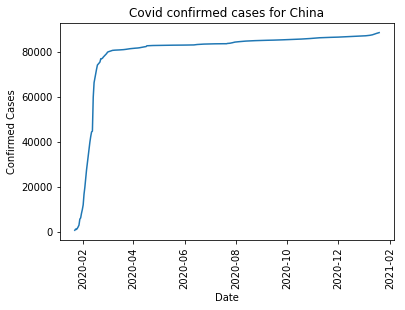

In [444]:
covid_cnfrm_china= covid_cnfrm_updated2.loc[covid_cnfrm_updated2['Country/Region']=='Mainland China',:]
plt.figure(figsize=(60,30))

fig, ax = plt.subplots()
plt.plot(covid_cnfrm_china['ObservationDate'],covid_cnfrm_china['Confirmed'])
every_nth = 1
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
plt.xticks(rotation= 90)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Covid confirmed cases for China')
plt.show()
#covid_cnfrm_china.head()

In [445]:
#covid_cnfrm_updated_cntrywise=covid_cnfrm_updated.groupby('Country/Region').sum()
#covid_cnfrm_updated_cntrywise

<Figure size 4320x2160 with 0 Axes>

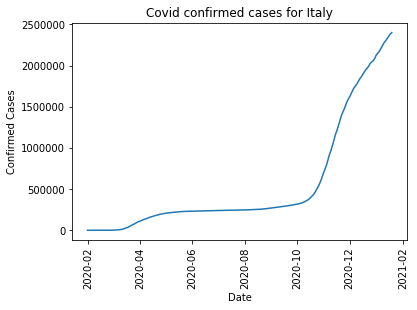

In [446]:
covid_cnfrm_italy= covid_cnfrm_updated2.loc[covid_cnfrm_updated2['Country/Region']=='Italy',:]
plt.figure(figsize=(60,30))

fig, ax = plt.subplots()
plt.plot(covid_cnfrm_italy['ObservationDate'],covid_cnfrm_italy['Confirmed'])
every_nth = 1
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Covid confirmed cases for Italy')
plt.show()

<Figure size 4320x2160 with 0 Axes>

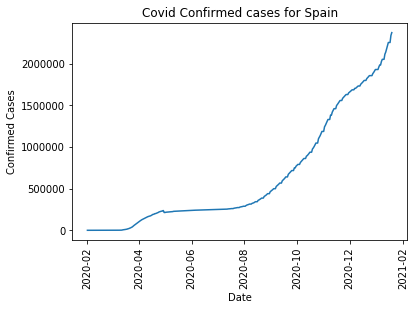

In [447]:
covid_cnfrm_spain= covid_cnfrm_updated2.loc[covid_cnfrm_updated2['Country/Region']=='Spain',:]
plt.figure(figsize=(60,30))

fig, ax = plt.subplots()
plt.plot(covid_cnfrm_spain['ObservationDate'],covid_cnfrm_spain['Confirmed'])

#plt.locator_params(axis=x,nbins=10)


every_nth = 1
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Covid Confirmed cases for Spain')
plt.show()

### Module : find maxmimum infection rate for China

In [448]:
#covid_cnfrm_italy.loc["China"].diff().max()
#covid_cnfrm_china= covid_cnfrm_updated2.loc[covid_cnfrm_updated2['Country/Region']=='Mainland China',:]
#covid_cnfrm_china.set_index('Country/Region',inplace=True)

In [449]:
#covid_df_agg.loc["China"].diff().max()

In [450]:
covid_cnfrm_china.Confirmed.diff().max()

15133.0

In [451]:
covid_cnfrm_china.head()

,ObservationDate,Country/Region,Confirmed
3670,2020-01-22,Mainland China,547.0
3681,2020-01-23,Mainland China,1082.0
3695,2020-01-24,Mainland China,916.0
3707,2020-01-25,Mainland China,1399.0
3722,2020-01-26,Mainland China,2062.0


### Module : find maximum infection rate for all of the countries. 

In [452]:
covid_cnfrm_updated2.head()

,ObservationDate,Country/Region,Confirmed
3667,2020-01-22,Hong Kong,0.0
3668,2020-01-22,Japan,2.0
3669,2020-01-22,Macau,1.0
3670,2020-01-22,Mainland China,547.0
3671,2020-01-22,South Korea,1.0


In [453]:
covid_cnfrm_updated2.columns=['ObservationDate', 'Country', 'Confirmed']

In [454]:
covid_cnfrm_updated2.head()

,ObservationDate,Country,Confirmed
3667,2020-01-22,Hong Kong,0.0
3668,2020-01-22,Japan,2.0
3669,2020-01-22,Macau,1.0
3670,2020-01-22,Mainland China,547.0
3671,2020-01-22,South Korea,1.0


In [455]:
covid_cnfrm_updated2.set_index('Country',inplace=True)

In [456]:
covid_cnfrm_updated2.loc['Japan'].Confirmed.diff().max()

7863.0

In [457]:
sorted(countries)

['Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghan

In [458]:
covid_cnfrm_updated3=covid_cnfrm_updated2.reset_index()

In [459]:
covid_cnfrm_updated3.head()

,Country,ObservationDate,Confirmed
0,Hong Kong,2020-01-22,0.0
1,Japan,2020-01-22,2.0
2,Macau,2020-01-22,1.0
3,Mainland China,2020-01-22,547.0
4,South Korea,2020-01-22,1.0


In [460]:
#covid_cnfrm_updated3.drop('index',axis=1,inplace=True)

In [461]:
countries=list(covid_cnfrm_updated3['Country'])

max_infection_rate2 = []
for c in countries:
    max_infection_rate2.append(covid_cnfrm_updated3.loc[covid_cnfrm_updated3['Country']==c,:].Confirmed.diff().max())
    
max_infection_rate2

[476.0,
 7863.0,
 5.0,
 15133.0,
 1237.0,
 27.0,
 745.0,
 298031.0,
 1237.0,
 50.0,
 298031.0,
 745.0,
 27.0,
 1426.0,
 28115.0,
 4029.0,
 6725.0,
 5.0,
 7863.0,
 476.0,
 21078.0,
 87843.0,
 716.0,
 15133.0,
 298031.0,
 745.0,
 27.0,
 1237.0,
 1426.0,
 476.0,
 5.0,
 7863.0,
 86655.0,
 50.0,
 15133.0,
 27.0,
 745.0,
 1237.0,
 50.0,
 1426.0,
 298031.0,
 5743.0,
 716.0,
 15133.0,
 5.0,
 7863.0,
 476.0,
 86655.0,
 4029.0,
 50.0,
 298031.0,
 745.0,
 27.0,
 1237.0,
 1426.0,
 5743.0,
 4029.0,
 5.0,
 7863.0,
 476.0,
 86655.0,
 16141.0,
 716.0,
 15133.0,
 4029.0,
 50.0,
 298031.0,
 745.0,
 27.0,
 878.0,
 1426.0,
 5743.0,
 15133.0,
 1237.0,
 7863.0,
 430.0,
 476.0,
 86655.0,
 16141.0,
 31.0,
 716.0,
 5.0,
 1426.0,
 1237.0,
 878.0,
 5743.0,
 745.0,
 298031.0,
 50.0,
 27.0,
 4029.0,
 5.0,
 15133.0,
 7863.0,
 476.0,
 49044.0,
 86655.0,
 16141.0,
 31.0,
 716.0,
 1426.0,
 1237.0,
 878.0,
 27.0,
 3491.0,
 298031.0,
 50.0,
 5743.0,
 745.0,
 15133.0,
 4029.0,
 716.0,
 7863.0,
 476.0,
 49044.0,
 86655.0,

Lets append maximum infection rates with respective countries.

In [462]:
#max_infection_covid21=pd.DataFrame('Country'=countries,Max_infection_rate'=max_infection_rate2)
#merge countries and max_infection_rate2 using zip and create a tuple these two lists

temp_tuple=list(zip(countries,max_infection_rate2))
temp_tuple

[('Hong Kong', 476.0),
 ('Japan', 7863.0),
 ('Macau', 5.0),
 ('Mainland China', 15133.0),
 ('South Korea', 1237.0),
 ('Taiwan', 27.0),
 ('Thailand', 745.0),
 ('United States', 298031.0),
 ('South Korea', 1237.0),
 ('Vietnam', 50.0),
 ('United States', 298031.0),
 ('Thailand', 745.0),
 ('Taiwan', 27.0),
 ('Singapore', 1426.0),
 ('Mexico', 28115.0),
 ('Malaysia', 4029.0),
 ('Philippines', 6725.0),
 ('Macau', 5.0),
 ('Japan', 7863.0),
 ('Hong Kong', 476.0),
 ('Colombia', 21078.0),
 ('Brazil', 87843.0),
 ('Australia', 716.0),
 ('Mainland China', 15133.0),
 ('United States', 298031.0),
 ('Thailand', 745.0),
 ('Taiwan', 27.0),
 ('South Korea', 1237.0),
 ('Singapore', 1426.0),
 ('Hong Kong', 476.0),
 ('Macau', 5.0),
 ('Japan', 7863.0),
 ('France', 86655.0),
 ('Vietnam', 50.0),
 ('Mainland China', 15133.0),
 ('Taiwan', 27.0),
 ('Thailand', 745.0),
 ('South Korea', 1237.0),
 ('Vietnam', 50.0),
 ('Singapore', 1426.0),
 ('United States', 298031.0),
 ('Nepal', 5743.0),
 ('Australia', 716.0),
 ('Ma

In [463]:
#Converting the temp tuple into pandas dataframe:
max_infection_covid21=pd.DataFrame(temp_tuple,columns=['Country','Max_Infection_Rate'])
max_infection_covid21.head()

,Country,Max_Infection_Rate
0,Hong Kong,476.0
1,Japan,7863.0
2,Macau,5.0
3,Mainland China,15133.0
4,South Korea,1237.0


Since infection data was present in chronological order in same column for all the countries, calculated maximum infection rate has been populated for the corresponding countries in repetative manner and now it requires duplicate removal.

In [464]:
max_infection_covid21.drop_duplicates(inplace=True)

Earlier we have analysed our short term covid infection data along with Happiness report and observed how GDP per capita, Social suport impacted maxium infection rate. Now we have gathered long term data(Jan 2020 to Feb 2021) and now we will see from broader perspective that how Happiness report has impacted this covid infection rate. 

In [465]:
print(len(happiness_report.index))
print(len(max_infection_covid21.Country))

156
219


Worldhappiness report has data for 156 countries where as our current covid 19 data set has records for 222 countries.
We have happiness report for Ireland but covid data for North Ireland and Republic of Ireland.Since in 2020 North Ireland separated from the two other jurisdictions in the United Kingdom (England and Wales, and Scotland),
we dont have Happiness report(GDP data) for North Ireland country and Republic of Ireland separately.

Also happiness report does not have GDP data for Equatorial Guinea separately.Similarly there are few countries for happiness report does have any data.
The Republic of the Congo, also called Congo-Brazzaville.
There are four countries in happiness report which use different naming formats.They are as follows:
Republic of the Congo - Congo (Brazzaville) (as per happiness report)
Mainland China - China (as per happiness report)
US - United States (as per happiness report)
UK - United Kingdom (as per happiness report)

For our analysis purpose we will change the names in our max infection covid data to match them with happiness report.


In [466]:
max_infection_covid21['Country'].replace("Republic of the Congo","Congo-Brazzaville",inplace=True)
max_infection_covid21['Country'].replace("Mainland China","China",inplace=True)
max_infection_covid21['Country'].replace("US","United States",inplace=True)
max_infection_covid21['Country'].replace("UK","United Kingdom",inplace=True)

In [467]:
max_infection_covid21.head()

,Country,Max_Infection_Rate
0,Hong Kong,476.0
1,Japan,7863.0
2,Macau,5.0
3,China,15133.0
4,South Korea,1237.0


In [468]:
#Since Hapiness report data has Country names as index , covid data needs to set Country as index before joining for further analysis. 
max_infection_covid21.set_index('Country',inplace=True)

In [469]:
#Inner join max_infection_covid21 and happiness_report based on Country names
covid_infection_happiness_full_data=max_infection_covid21.join(happiness_report,how="inner")

In [470]:
#Lets have a look at merged data
covid_infection_happiness_full_data.head()

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Hong Kong,476.0,1.438,1.277,1.122,0.440,0.258
Japan,7863.0,1.327,1.419,1.088,0.445,0.069
China,15133.0,1.029,1.125,0.893,0.521,0.058
South Korea,1237.0,1.301,1.219,1.036,0.159,0.175
Taiwan,27.0,1.368,1.430,0.914,0.351,0.242


We will set aside 'Freedom to make life choices' and 'Generosity' from current analysis.

In [471]:
covid_infection_happiness_full_data.drop(['Freedom to make life choices','Generosity'],axis=1,inplace=True)

In [472]:
#Lets check the correlation between different key attributes with Max_infection_rate
covid_infection_happiness_full_data.corr()

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy
Max_Infection_Rate,1.000000,0.146425,0.101011,0.101397
GDP per capita,0.146425,1.000000,0.757385,0.859511
Social support,0.101011,0.757385,1.000000,0.749184
Healthy life expectancy,0.101397,0.859511,0.749184,1.000000


We will visualize correlation between different key attributes with Max_infection_rate

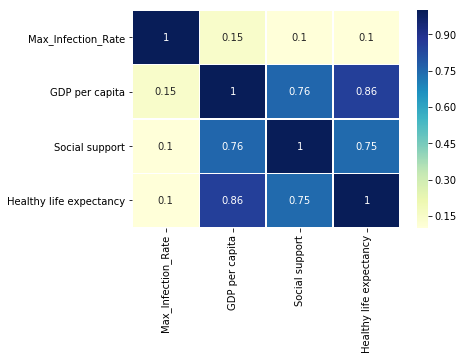

In [473]:
sns.heatmap(covid_infection_happiness_full_data.corr(),annot=True,linewidths=0.5,cmap="YlGnBu")

Clearly Max_Infection_rate has insignificant correlation with various happiness factors even for broad spectrum of covid data. And correlation does not imply casual relationship

Lets Visualize  the results for covid infection data and life factors 

### Plot Max_infection_rate vs GDP per capita

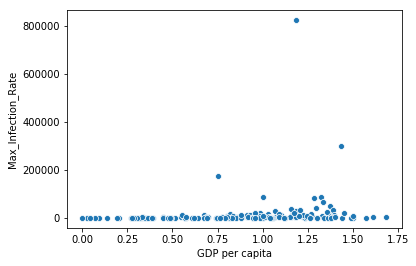

In [474]:
x=covid_infection_happiness_full_data["GDP per capita"]
y=covid_infection_happiness_full_data["Max_Infection_Rate"]
sns.scatterplot(x,y)

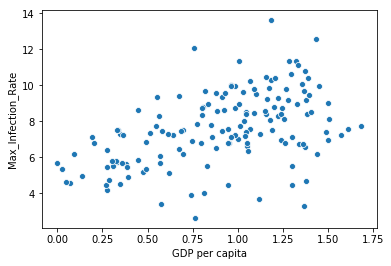

In [475]:
sns.scatterplot(x,np.log(y))

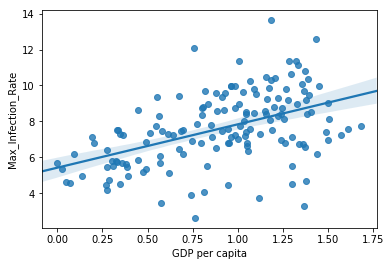

In [476]:
sns.regplot(x,np.log(y))

Trend shows Countries with high GDP per capita tends to catch more covid infection.

## Plot Max_infection_rate vs Social support

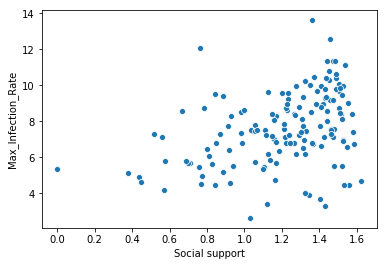

In [477]:
x=covid_infection_happiness_full_data["Social support"]
y=covid_infection_happiness_full_data["Max_Infection_Rate"]
sns.scatterplot(x,np.log(y))

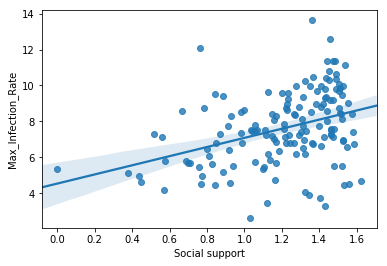

In [478]:
sns.regplot(x,np.log(y))

This trend graph also shows that countries where people get more social support tends to catch covid infection more quickly.

In [479]:
## Plot Max_infection_rate vs Healthy life expectancy

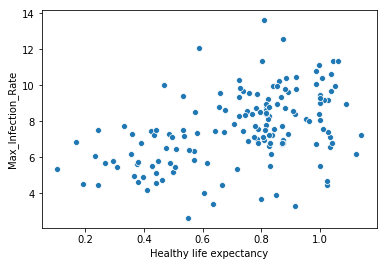

In [480]:
x=covid_infection_happiness_full_data["Healthy life expectancy"]
y=covid_infection_happiness_full_data["Max_Infection_Rate"]
sns.scatterplot(x,np.log(y))

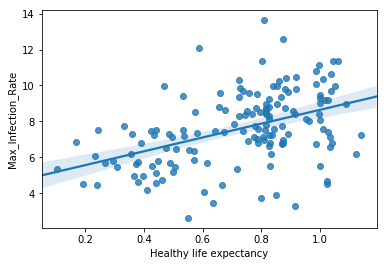

In [481]:
sns.regplot(x,np.log(y))

In [482]:
max_infection_covid21.head()

,Max_Infection_Rate
Country,
Hong Kong,476.0
Japan,7863.0
Macau,5.0
China,15133.0
South Korea,1237.0


Countries where people has more healthy life expectency may catch covid infection more quickly.

### Lets visualize confirmed Covid cases for top 10 covid affected countries.

We will select top 10 countries where covid infection rate is maximum.

In [483]:
max_infection_covid21.sort_values(by='Max_Infection_Rate',ascending=False).head(10)

,Max_Infection_Rate
Country,
Turkey,823225.0
United States,298031.0
India,173932.0
Brazil,87843.0
France,86655.0
Spain,84287.0
United Kingdom,68192.0
Germany,49044.0
Italy,40902.0


In [484]:
top10_countries=list(max_infection_covid21.sort_values(by='Max_Infection_Rate',ascending=False).head(10).index)

In [485]:
top10_countries

['Turkey',
 'United States',
 'India',
 'Brazil',
 'France',
 'Spain',
 'United Kingdom',
 'Germany',
 'Italy',
 'Chile']

In [486]:
#Top 10 Countries
for c in top10_countries:
    print(c)

Turkey
United States
India
Brazil
France
Spain
United Kingdom
Germany
Italy
Chile


In [487]:
covid_cnfrm_updated2.head()

,ObservationDate,Confirmed
Country,,
Hong Kong,2020-01-22,0.0
Japan,2020-01-22,2.0
Macau,2020-01-22,1.0
Mainland China,2020-01-22,547.0
South Korea,2020-01-22,1.0


We will extract confirmed covid cases data for top 10 affected countries from covid_cnfrm_updated2

In [488]:
covid_cnfrm_top10= covid_cnfrm_updated2[covid_cnfrm_updated2.index.isin(top10_countries)]
covid_cnfrm_top10.head()

,ObservationDate,Confirmed
Country,,
United States,2020-01-22,1.0
United States,2020-01-23,1.0
Brazil,2020-01-23,0.0
United States,2020-01-24,2.0
France,2020-01-24,2.0


In [489]:
covid_cnfrm_top10=covid_cnfrm_top10.reset_index()
covid_cnfrm_top10.head()

,Country,ObservationDate,Confirmed
0,United States,2020-01-22,1.0
1,United States,2020-01-23,1.0
2,Brazil,2020-01-23,0.0
3,United States,2020-01-24,2.0
4,France,2020-01-24,2.0


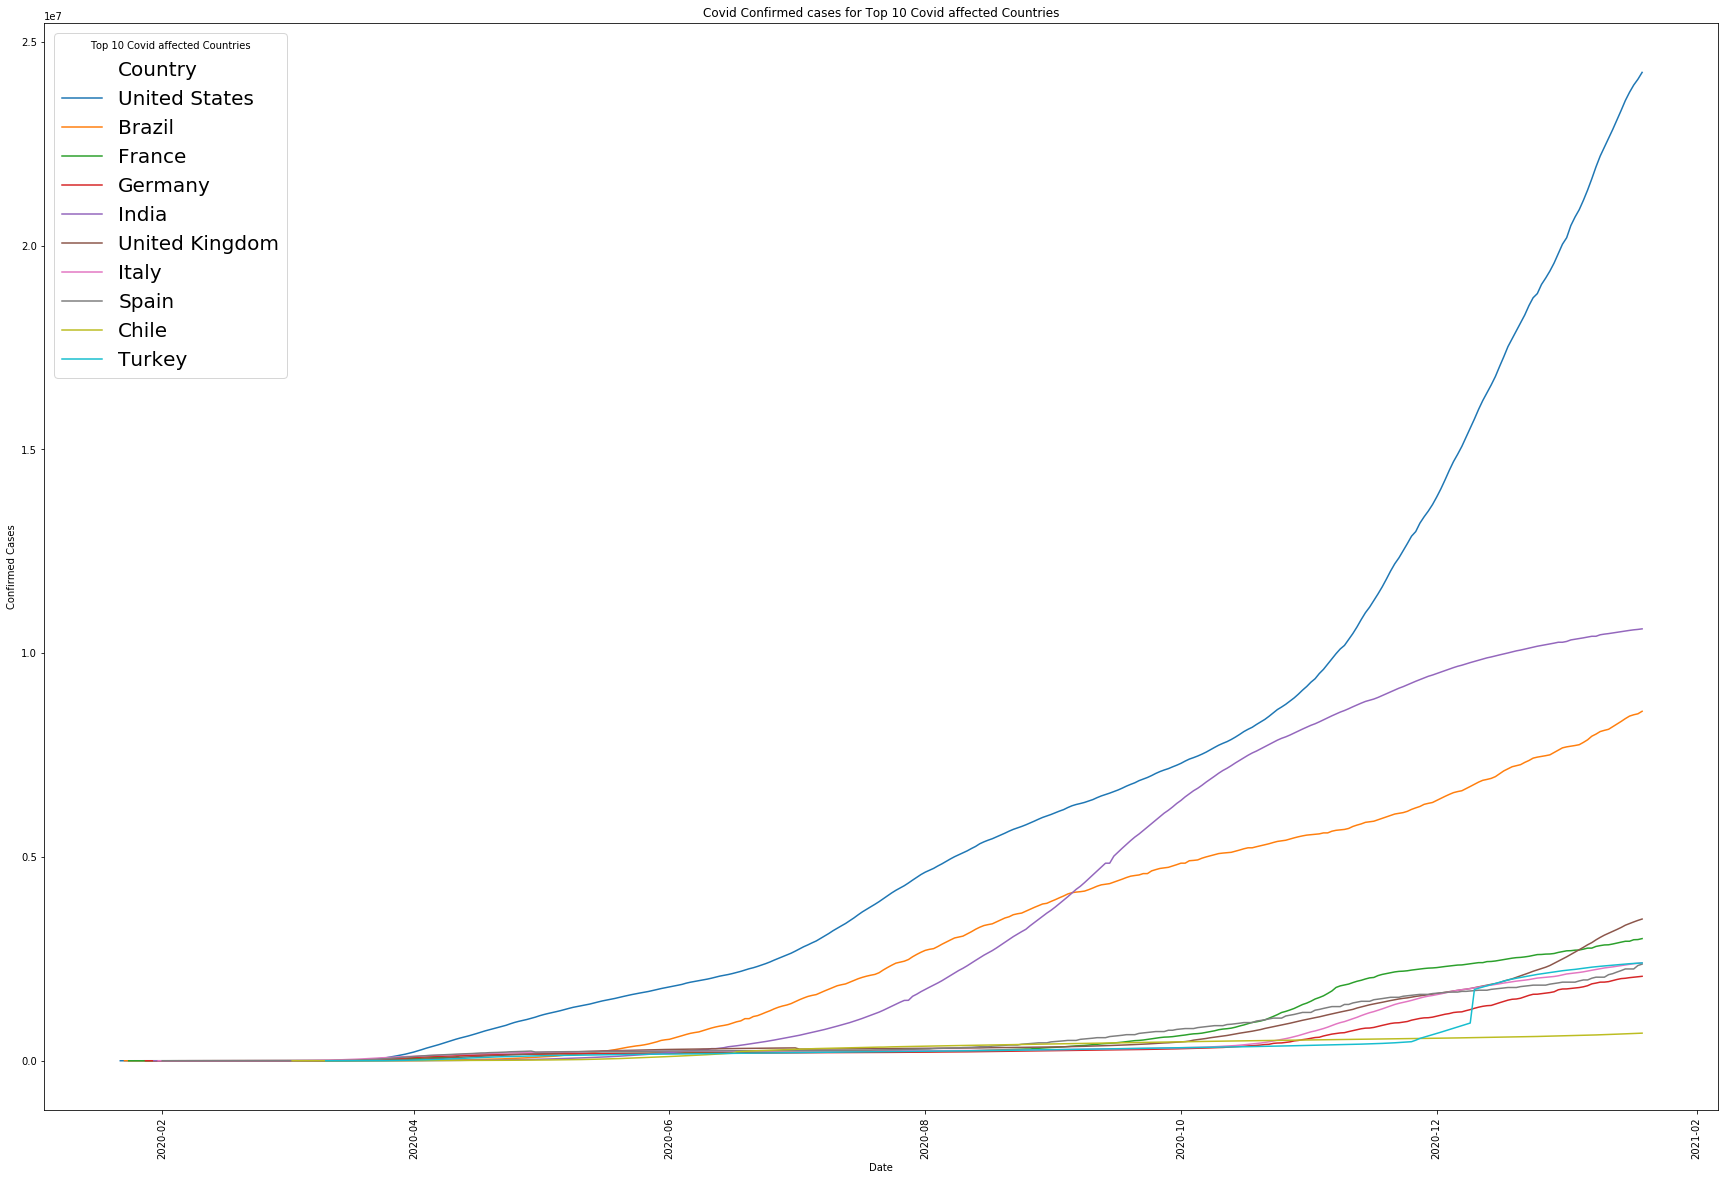

In [492]:
plt.figure(figsize=(30,20))
sns.lineplot(x="ObservationDate", y="Confirmed",
             hue="Country",data=covid_cnfrm_top10)

plt.xticks(rotation= 90)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Covid Confirmed cases for Top 10 Covid affected Countries')
plt.legend(loc='upper left',fontsize=20,title='Top 10 Covid affected Countries')
plt.show()

Infection rate in United States is the highest through out the whole year and it is still rising in exponential order whereas in case of India, though it comes in second place, infection rate curve seems to be flattening now. Brazil comes in third place and from the above visualization, it seems infection rate is to some extent controlled now.